## Проект "Телеком"


### Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.


###  Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Данные находятся в папке /datasets/final_provider/



###  Этапы выполнения проекта

1. Составление плана работы и исследование данных:
- выгрузка датафреймов,
- предварительный анализ данных,
- обозначение дальнейших шагов.

2. Предобработка данных и разработка модели

3. Составление отчёта


###  Список уточняющих вопросов

1. Что приравнивается к оттоку(расторжение договора/прекращение использования услуг или ситуация, в которой клиент вначале активно пользуется услугой, а затем сводит пользование до минимума. Что именно влияет на отток (какие признаки)?Какие именно данные говорят,что клиент ушел окончательно? 
2. Отток можно считать  не "в целом" по клиентам или для конкретных сегментов? 
3. Какие клиенты(в каких сегментах) уходят и по какой причине? Какой отток считается приемлемым? 
4. Как считается отток клиентов в компании: в количестве пользователей и в деньгах? За какой период считается отток клиентов в компании(месяц, квартал, год)?Имеются ли какие-то тенденции в оттоке клиентов, т. е. бывают ли определенные периоды(сезонность), когда отток становится более сильным? Сколько клиентов теряет компания за анализируемый период?
5. Какие услуги являются определяющими выбор клиента?
6. Какое среднее время жизни клиента в компании и доход с клиента за весь период ?
7. Какая модель машинного обучения может быть использована для прогнозирования оттока?Какой горизонт прогнозирования?
8. На что еще важно обратить внимание?

### Предварительный план

- Изучение и обработка данных.
- Предварительный анализ данных, включая описание признаков, характеристики, визуализация.
- Исследование взаимосвязей между признаками и целевой переменной.
- Создание признаков для использования в модели машинного обучения.
- Выбор и обучение модели машинного обучения, подбор параметров модели.
- Дизайн исследования – подтверждение эффективности выдвинутых гипотез.
- Оценка качества модели.
- Выводы.

In [ ]:
%pip install phik

In [171]:
#загрузим потренциально необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import namedtuple
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, cv
from sklearn.pipeline import make_pipeline
from catboost import CatBoostClassifier
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
import timeit
import datetime
from sklearn.metrics import f1_score

from sklearn import datasets

import phik
from phik.report import plot_correlation_matrix
from phik import report

pd.set_option('display.max_columns', None)

# константы 
RANDOM_STATE = 130323

In [3]:
#загрузим данные
try:
   contract = pd.read_csv('./datasets/final_provider/contract.csv')
   personal = pd.read_csv('./datasets/final_provider/personal.csv')
   internet = pd.read_csv('./datasets/final_provider/internet.csv')
   phone = pd.read_csv('./datasets/final_provider/phone.csv')

except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
    
    #contract = pd.read_csv('contract.csv')
    #personal = pd.read_csv('personal.csv')
    #internet = pd.read_csv('internet.csv') 
    #phone = pd.read_csv('phone.csv')
    

<a name="analyse_files"></a>
## Изучение файлов



# CONTRACT

In [4]:
contract.shape

(7043, 8)

In [5]:
contract.duplicated().sum()

0

In [6]:
display(contract.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [7]:
display(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

In [8]:
display(contract.describe(include='all')) 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,3338-CVVEH,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [9]:
contract['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [10]:
contract['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


# PERSONAL

In [11]:
personal.shape

(7043, 5)

In [12]:
personal.duplicated().sum()

0

In [13]:
display(personal.head())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
display(personal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

In [15]:
display(personal.describe(include='all')) 

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,3338-CVVEH,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [16]:
personal['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [17]:
personal['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [18]:
personal['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64


# INTERNET

In [19]:
internet.shape

(5517, 8)

In [20]:
internet.duplicated().sum()

0

In [21]:
display(internet.head())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [22]:
display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

In [23]:
display(internet.describe(include='all')) 

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,9500-LTVBP,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [24]:
internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64


# PHONE

In [25]:
phone.shape

(6361, 2)

In [26]:
phone.duplicated().sum()

0

In [27]:
display(phone.head())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [28]:
display(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

In [29]:
display(phone.describe(include='all')) 

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,3338-CVVEH,No
freq,1,3390


In [30]:
phone['MultipleLines'].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64


##  Подготовка 

Подготовим данные, выделим целевой признак оттока клиентов: Сustomer_churn( если есть дата ухода, то целевой призак 1),если значение в столбце EndDate - No, то целевой признак равен 0.

In [31]:
contract['Сustomer_churn'] = (contract['EndDate'] != 'No').astype(int)

In [32]:
contract['EndDate'] = contract['EndDate'].replace(['No'], ['2020-02-01'])

In [33]:
print(contract[contract['EndDate'] == 'No'].shape[0])

0


In [34]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')

In [35]:
contract['AllDays'] = (contract['EndDate'] - contract['BeginDate']).dt.days

In [36]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors ='coerce')

In [37]:
contract[contract['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0,0


In [38]:
personal = personal.rename(columns={'customerID': 'CustomerID', 'gender': 'Gender'})

In [39]:
contract = contract.rename(columns={'customerID': 'CustomerID'})

In [40]:
internet = internet.rename(columns={'customerID': 'CustomerID'})

In [41]:
phone = phone.rename(columns={'customerID': 'CustomerID'})

In [42]:
contract['TotalCharges'] = contract['TotalCharges'].fillna(0)

In [43]:
contract['TotalCharges'].isnull().sum()

0

In [44]:
#объединим в один датафрейм
df = contract \
    .merge(personal, how='left', on='CustomerID') \
    .merge(internet, how='left', on= 'CustomerID') \
    .merge(phone, how='left', on='CustomerID') 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Сustomer_churn    7043 non-null   int64         
 9   AllDays           7043 non-null   int64         
 10  Gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   5517 n

In [46]:
for column in ('InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'):
    df[column] = df[column].fillna('No')

In [47]:
df['CustomerID'].is_unique

True

In [48]:
df = df.set_index('CustomerID')

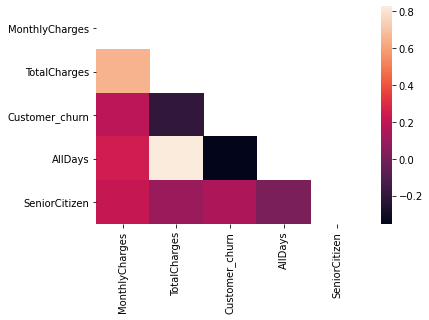

In [49]:
# построим тепловую карту корреляции
mask = np.triu(np.ones_like(df.corr()))
 
dataplot = sns.heatmap(df.corr(), mask=mask)

# выведем на экран
plt.show()   

In [50]:
df.corr()['Сustomer_churn'].sort_values(ascending=False)

Сustomer_churn    1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.198324
AllDays          -0.352673
Name: Сustomer_churn, dtype: float64

Корреляция - важнейший фактор, лежащий в основе анализа данных: по графику корреляций мы можем понять какие переменные в наборе данных связаны друг с другом. Значение корреляции колеблется от -1 до +1.
0 - Корреляция означает, что две переменные не зависят друг от друга,
положительная корреляция указывает на то, что переменные движутся в одном направлении,
отрицательная корреляция указывает на противоположное.

In [51]:
display(df.describe(include='all').T) 

/tmp/ipykernel_290/3449218332.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all').T)
/tmp/ipykernel_290/3449218332.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all').T)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
BeginDate,7043,77,2014-02-01 00:00:00,366,2013-10-01,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EndDate,7043,5,2020-02-01 00:00:00,5174,2019-10-01,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7043,3,Month-to-month,3875,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,7043.0,NaN,NaN,NaN,NaT,NaT,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7043.0,NaN,NaN,NaN,NaT,NaT,2279.734304,2266.79447,0.0,398.55,1394.55,3786.6,8684.8
Сustomer_churn,7043.0,NaN,NaN,NaN,NaT,NaT,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
AllDays,7043.0,NaN,NaN,NaN,NaT,NaT,985.996166,747.587844,0.0,273.0,883.0,1676.0,2191.0
Gender,7043,2,Male,3555,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Сustomer_churn    7043 non-null   int64         
 8   AllDays           7043 non-null   int64         
 9   Gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity

In [53]:
categorial_columns = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
    'Gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'MultipleLines',
]

Посмотрим распределение значений данных

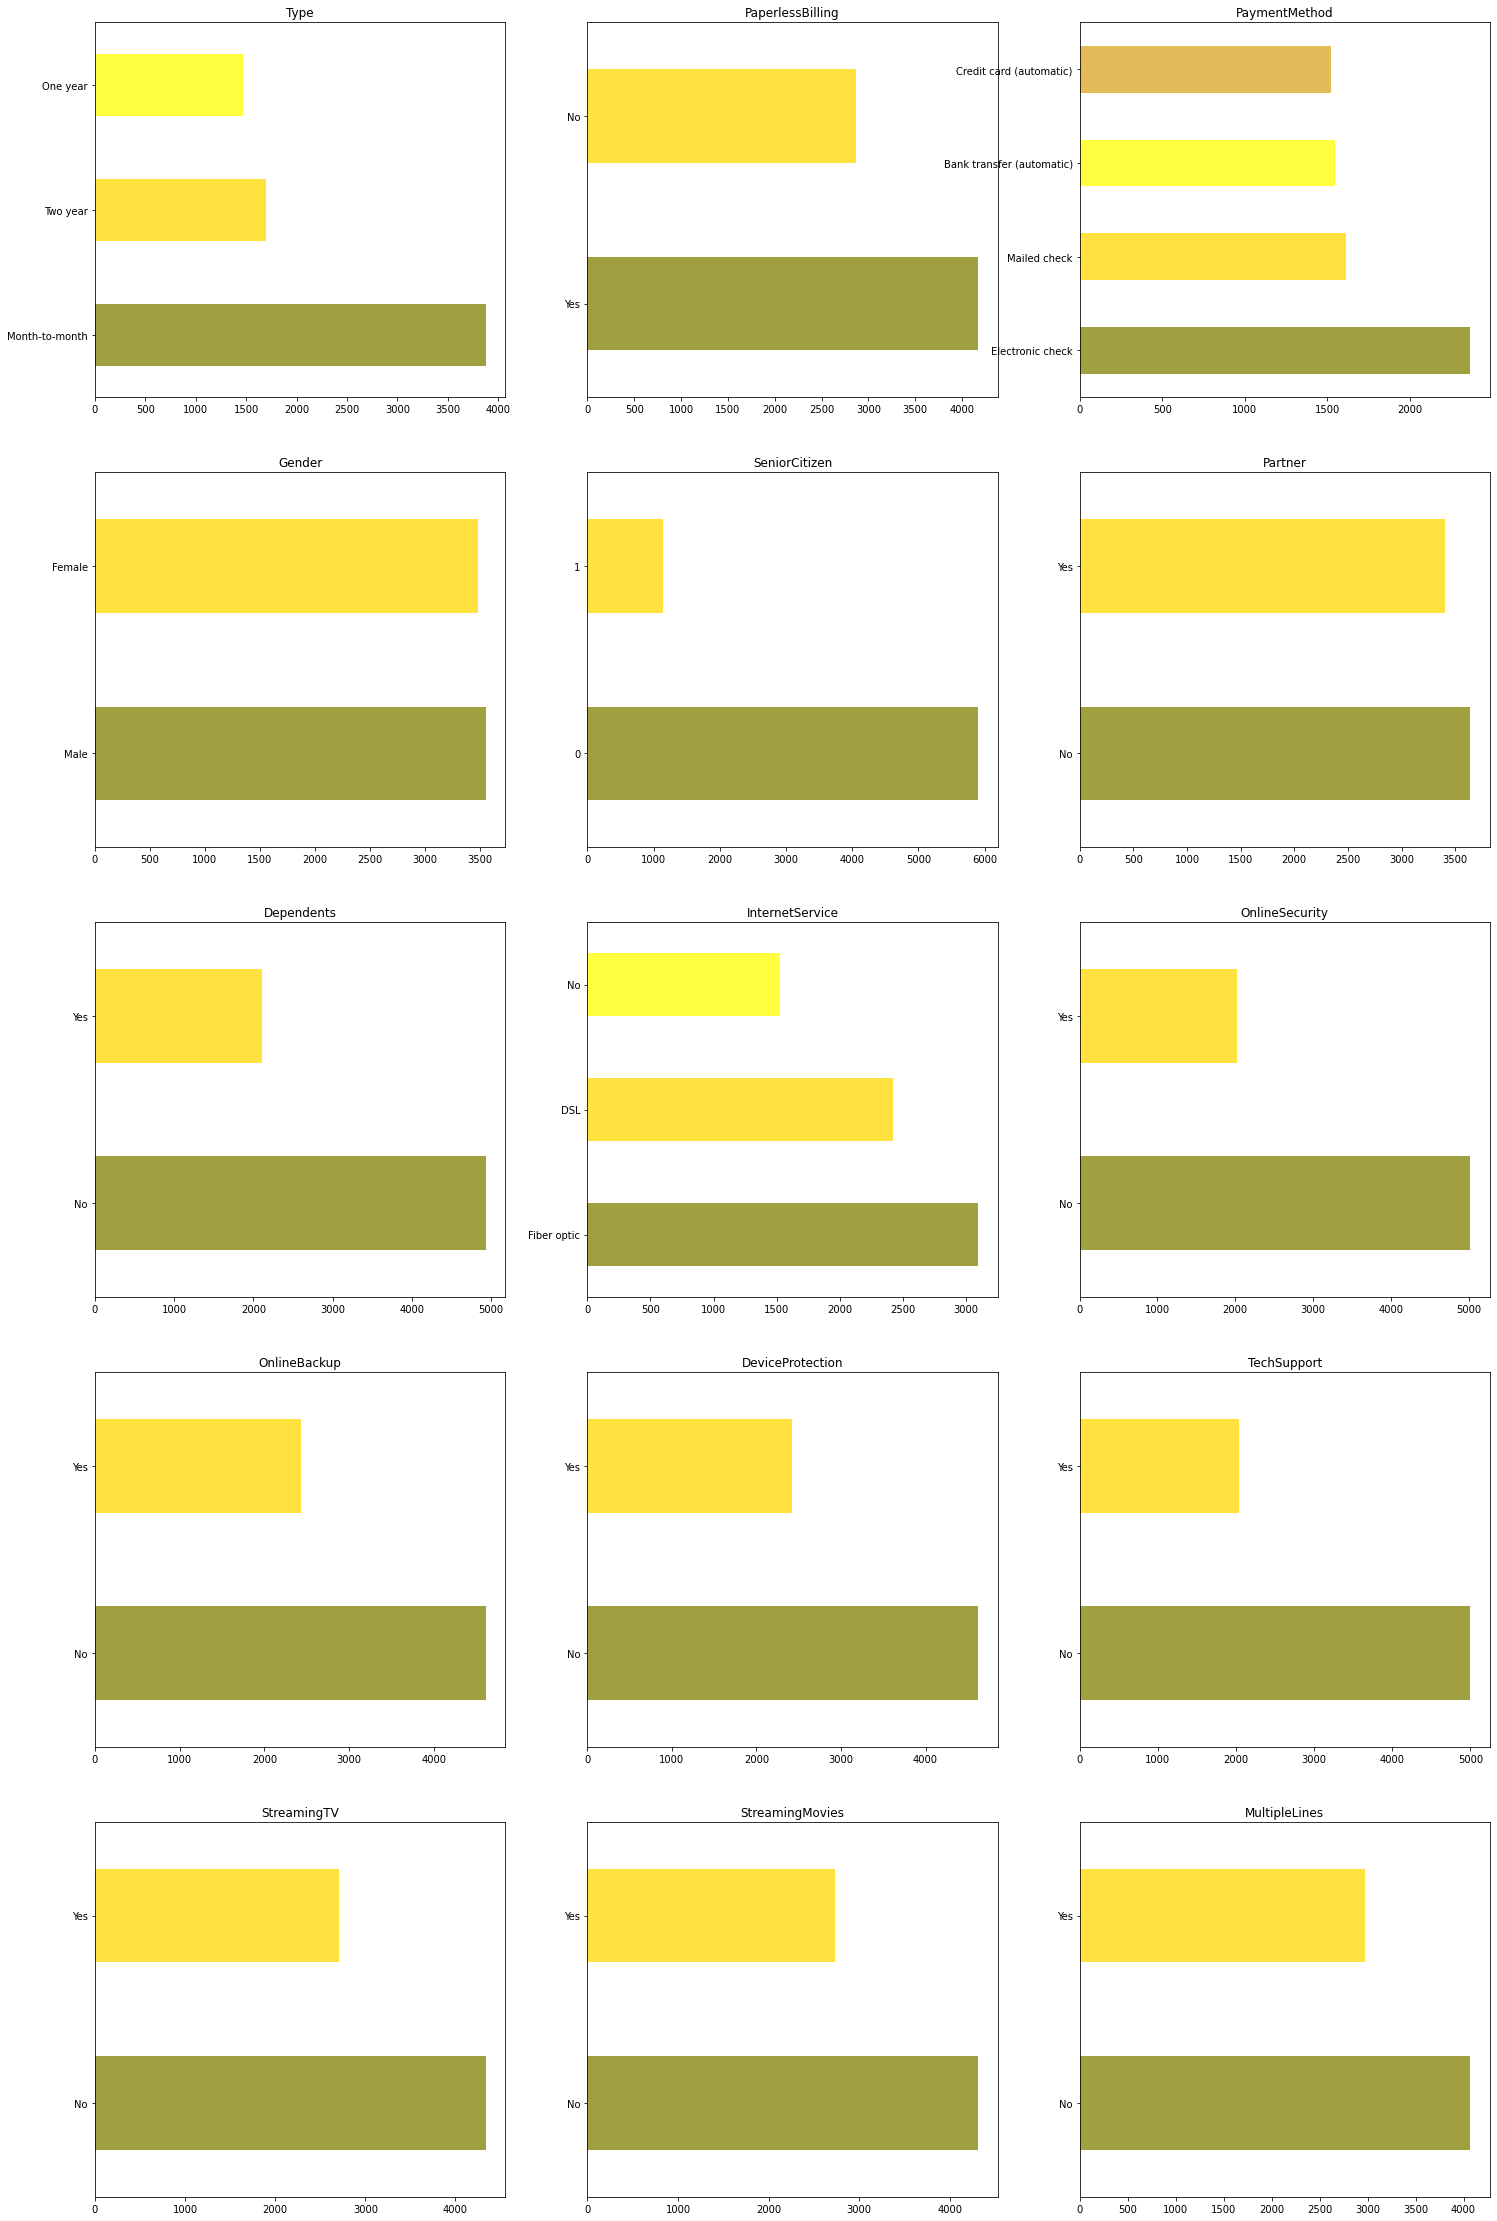

In [54]:

cols = 3
rows = int(np.ceil(len(categorial_columns)/ cols))
 
    
plt.figure(figsize=(25, 40))

for idx, column in enumerate(categorial_columns):
    ax = plt.subplot(rows, cols, idx + 1)
    
    df[column].value_counts().plot(
        kind='barh', 
        title=column, 
        ax=ax,
        alpha=0.75,
        color = ['olive','gold','yellow', 'goldenrod'],
    )

plt.show()

Вывод:
- Самый популярный способ оплаты - помесячный.
- Пользователи предпочитают получать счета в электронном виде и оплачивают их  электронным чеком.
- Распределение м/ж примерно одинаковое, как и партнерские отношения.
- Самый частый способ подключения - оптоволокно.
- Такие дополнительные услуги как OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines не пользуются очень большой популярностью.

In [55]:
del df['BeginDate'], df['EndDate']

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Сustomer_churn    7043 non-null   int64  
 6   AllDays           7043 non-null   int64  
 7   Gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

In [57]:
numeric_columns = ['MonthlyCharges', 'AllDays','TotalCharges'] 

In [58]:
def plot_numerical(df):
    cols = 3
    rows = 2

    plt.figure(figsize=(15, 10))

    idx = 0
    for column in numeric_columns:
        idx += 1 
    
        plt.subplot(rows, cols, idx)
        plt.hist(df[column])
        plt.title(column)

    plt.show()

    display(df[numeric_columns].describe())

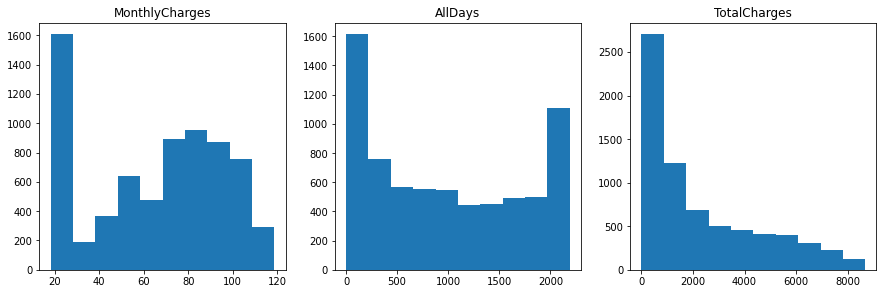

,MonthlyCharges,AllDays,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,64.761692,985.996166,2279.734304
std,30.090047,747.587844,2266.794470
min,18.250000,0.000000,0.000000
25%,35.500000,273.000000,398.550000
50%,70.350000,883.000000,1394.550000
75%,89.850000,1676.000000,3786.600000
max,118.750000,2191.000000,8684.800000


In [59]:
plot_numerical(df)

Вывод:
- У MonthlyCharges выделяется значение ~ 20, что является минимальным значением.
- В AlllDays  два пиковых значения.
- Значения в TotalCharges убывают, в столбце MonthlyCharges виден пик в райне 85 - это значит, что пользователи, которые платят за тариф больше всех, не остаются на длительный период.
- Аномальных выбросов нет.

<a name="prepare_data_for_models"></a>
## Подготовка данных для моделей

In [60]:
def get_data_info(data):
    display(df.sample(2))
    display(df.info())
    display(df.describe(include='all'))

In [61]:
target = df['Сustomer_churn']
features = df.drop(['Сustomer_churn'], axis=1)

In [62]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)

In [63]:
features_train.shape

(5282, 18)

In [64]:
features_test.shape

(1761, 18)

In [65]:
target_train.shape


(5282,)

In [66]:
 target_test.shape

(1761,)

In [67]:
get_data_info(features_train)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Сustomer_churn    7043 non-null   int64  
 6   AllDays           7043 non-null   int64  
 7   Gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,,
6663-JOCQO,One year,Yes,Bank transfer (automatic),75.25,2344.50,0,945,Male,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Yes
0504-HHAPI,Month-to-month,No,Credit card (automatic),88.30,2467.75,1,822,Female,1,No,No,Fiber optic,No,No,Yes,No,No,Yes,Yes


None

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,2,4,NaN,NaN,NaN,NaN,2,NaN,2,2,3,2,2,2,2,2,2,2
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,3875,4171,2365,NaN,NaN,NaN,NaN,3555,NaN,3641,4933,3096,5024,4614,4621,4999,4336,4311,4072
mean,NaN,NaN,NaN,64.761692,2279.734304,0.265370,985.996166,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.090047,2266.794470,0.441561,747.587844,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,35.500000,398.550000,0.000000,273.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.350000,1394.550000,0.000000,883.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.850000,3786.600000,1.000000,1676.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
get_data_info(features_test)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Сustomer_churn    7043 non-null   int64  
 6   AllDays           7043 non-null   int64  
 7   Gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,,
6061-PQHMK,One year,No,Credit card (automatic),19.90,527.50,0,761,Female,0,No,No,No,No,No,No,No,No,No,No
8473-VUVJN,Month-to-month,Yes,Electronic check,73.65,73.65,1,30,Male,1,No,No,Fiber optic,No,No,No,No,No,No,Yes


None

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,2,4,NaN,NaN,NaN,NaN,2,NaN,2,2,3,2,2,2,2,2,2,2
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,3875,4171,2365,NaN,NaN,NaN,NaN,3555,NaN,3641,4933,3096,5024,4614,4621,4999,4336,4311,4072
mean,NaN,NaN,NaN,64.761692,2279.734304,0.265370,985.996166,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.090047,2266.794470,0.441561,747.587844,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,35.500000,398.550000,0.000000,273.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.350000,1394.550000,0.000000,883.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.850000,3786.600000,1.000000,1676.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
get_data_info(target_train)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Сustomer_churn    7043 non-null   int64  
 6   AllDays           7043 non-null   int64  
 7   Gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,,
2037-XJFUP,One year,Yes,Electronic check,95.8,3036.75,1,1005,Male,0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,No
9732-OUYRN,One year,No,Credit card (automatic),19.0,918.70,0,1492,Female,0,Yes,No,No,No,No,No,No,No,No,No


None

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,2,4,NaN,NaN,NaN,NaN,2,NaN,2,2,3,2,2,2,2,2,2,2
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,3875,4171,2365,NaN,NaN,NaN,NaN,3555,NaN,3641,4933,3096,5024,4614,4621,4999,4336,4311,4072
mean,NaN,NaN,NaN,64.761692,2279.734304,0.265370,985.996166,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.090047,2266.794470,0.441561,747.587844,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,35.500000,398.550000,0.000000,273.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.350000,1394.550000,0.000000,883.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.850000,3786.600000,1.000000,1676.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
get_data_info(target_test)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,,
5499-ECUTN,One year,Yes,Credit card (automatic),66.05,3021.45,0,1432,Female,0,Yes,No,DSL,Yes,No,Yes,No,Yes,No,No
4879-GZLFH,Month-to-month,Yes,Electronic check,92.15,3875.40,0,1279,Female,0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,No


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Сustomer_churn    7043 non-null   int64  
 6   AllDays           7043 non-null   int64  
 7   Gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

None

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Сustomer_churn,AllDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,2,4,NaN,NaN,NaN,NaN,2,NaN,2,2,3,2,2,2,2,2,2,2
top,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,3875,4171,2365,NaN,NaN,NaN,NaN,3555,NaN,3641,4933,3096,5024,4614,4621,4999,4336,4311,4072
mean,NaN,NaN,NaN,64.761692,2279.734304,0.265370,985.996166,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,30.090047,2266.794470,0.441561,747.587844,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.250000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,35.500000,398.550000,0.000000,273.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,70.350000,1394.550000,0.000000,883.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,89.850000,3786.600000,1.000000,1676.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Мы разбили на выборки, закодируем и смаштабируем данные.
- Исследуем модели для решения задачи  классификации. 
- Минимальный порог для успешной сдачи AUC-ROC >= 0.85.

In [71]:
scaler = StandardScaler()
scaler.fit(features_train[numeric_columns])
features_train = features_train.copy()
features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
features_test = features_test.copy()
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

In [72]:
#scaler = StandardScaler()
#scaler.fit_transform(features_train[numeric_columns])
#features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

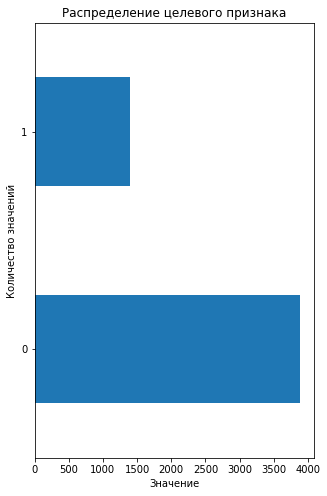

In [73]:
target_train.value_counts().plot(
    kind='barh', 
    figsize=(5, 8), 
    legend=False, 
    title='Распределение целевого признака', 
).set(xlabel='Значение', ylabel='Количество значений')
plt.show()

In [74]:
ratio = target_train[target_train == 1].count() / target_train[target_train == 0].count()

In [75]:
print(ratio)

0.3588886030357602


In [79]:
features_train = pd.get_dummies(features_train, drop_first = True)
features_test = pd.get_dummies(features_test, drop_first = True)

In [80]:
features_train.columns == features_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
df[numeric_columns].corr()

In [ ]:
df.corr()['Сustomer_churn'].sort_values(ascending=False)

Присутствует мультиколлинеарность в данных: корреляция между TotalCharges и AllDays - 0.82 (чем дольше клиент платит, тем больше итоговая сумма).

#  PHIK

Для информации: Это практичный коэффициент корреляции, который последовательно работает между категориальными, порядковыми и интервальными переменными, фиксирует нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального входного распределения.

In [ ]:
corr_matrix = df.phik_matrix()
plot_correlation_matrix(corr_matrix.values, 
                        x_labels=corr_matrix.columns, 
                        y_labels=corr_matrix.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title="correlation", 
                        fontsize_factor=1.5, 
                        figsize=(20, 10))
plt.tight_layout()

Вывод:
- чем выше цена за услуги в месяц, тем больше вероятность оттока.
- чем дольше клиент пользовался услугами, тем меньше вероятность оттока.

<a name="models_train"></a>
## Обучение моделей

### LogisticRegression

In [84]:
params = {
    "model__C": np.arange(0.001, 100, 5) 
}
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=1000, random_state=RANDOM_STATE)),
])
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=params,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10,
    refit=True,
)
logreg = grid_search.fit(features_train, target_train)


In [85]:
print(f"best score: {logreg.best_score_}")

best score: 0.8449904590073016


 ### RandomForestClassifier

In [86]:
params = {
    "min_samples_split": range(2, 20),
    "min_samples_leaf": range(1, 20),
}
clf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)

grid_search = GridSearchCV(clf, params, scoring="roc_auc", cv=5)
rf = grid_search.fit(features_train, target_train)

In [139]:
print(f"Best score: {rf.best_score_}")

Best score: 0.8552219492305735


 ### KNN

In [88]:
params = {
  "model__n_neighbors": range(1, 100),
  "model__metric": ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan", "nan_euclidean"],
}
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier()),
])

grid_search = GridSearchCV(
estimator=clf,
param_grid=params,
scoring="roc_auc",
n_jobs=-1,
cv=10,
refit=True,
)
knn = grid_search.fit(features_train, target_train)

In [89]:
print(f"best score: {knn.best_score_}")

best score: 0.8339335289778406


In [90]:
table = pd.DataFrame(index=['best_score_'], columns=['LogisticRegression','RandomForestClassifier','KNeighborsClassifier'])
table['LogisticRegression'] = logreg.best_score_
table['RandomForestClassifier'] = rf.best_score_
table['KNeighborsClassifier'] = knn.best_score_

table.T

,best_score_
LogisticRegression,0.844990
RandomForestClassifier,0.855222
KNeighborsClassifier,0.833934


In [ ]:
target_pred = rf.predict(features_test)
accuracy = accuracy_score(target_test, target_pred)
print("Accuracy:", accuracy)
print('F1:',f1_score(target_test, target_pred))

In [ ]:
probabilities_rf=rf.predict_proba(features_test)
probabilities_test_rf=probabilities_rf[:,1]

print('ROC-AUC:', roc_auc_score(target_test,probabilities_test_rf))

Анализ значимости признаков

Признаки, оказывающих на модель наибольшее влияние.

In [ ]:
clf = RandomForestClassifier(n_estimators=1000, min_impurity_decrease=0.001)
clf.fit(features_train, target_train)
pd.DataFrame(clf.feature_importances_, index= features_train.columns, columns=["importance"]) \
    .sort_values("importance") \
    .plot(kind="barh", legend=False, figsize=(12, 8));
plt.title("Важность факторов")

Прежде всего на лояльность пользователей виляет время использования услуг( AllDays)

<a name="models_train"></a>
## Итоговый отчет


В данном проекте оператор связи «Ниединогоразрыва.ком»  прогнозирует отток клиентов (уход клиента от использования продуктов компании). 
Анализ возможного оттока позволяет создать условия для удержания склонных к оттоку клиентов и  уменьшить количество пользователей, которые перестают пользоваться услугами оператора. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. 
Оператор собрал персональные данные о части своих клиентов, информацию о тарифах и договорах.

Цель исследования:  создать прогнозную модель, которая на основании имеющихся даннных будет предсказывать уход клиента от оператора. Метрикой оценки точности предсказания модели выбрана AUC-ROC.

Данные для анализа состояли из файлов, содержащих информацию о дате заключения контракта, дате расторжения контракта, сумм затрат на ежемесячные платежи и общих сумм затрат пользователей, персональной информации о клиентах, сведения об услугах интрернета, телефонии и других дополнительных услугах.

- contract.csv — информация о договоре;
- personal.csv — персональные данные клиента;
- internet.csv — информация об интернет-услугах;
- phone.csv — информация об услугах телефонии.

Были загружены все потенциально необходимые библиотеки и данные из четырех датасетов (и в дальнейшем объеденены в один датафрейм). Данные были прочитаны и сделаны предварительные выводы.
После этого была произведена первичная обработка данных - переименованы столбцы, изменены типы данных, добавлены новые столбцы - целевой признак Сustomer_churn, который означает отказался ли клиент от услуг и AllDays, обозначающий период времени, в течение которого клиент пользовался услугами.

Затем был проведен исследовательский анализ данных - проанализированы количественные и категоральные признаки, а также связь между ними и целевым признаком. Были сделан следующий вывод: со временем вероятность отказа от услуг снижается,отказываются от услуг те, кто платит больше.

Подготовлен набор данных для построения моделей, данные разделены на выборки (на обучающую и тестовую в соотношении тренировочной к тестовой = 3/1), проведено кодирование и масштабирование признаков, построена матрица корреляции, проведен анализ значимости признаков с помощью feature_importances_.

Были исследованы три модели:
- LogisticRegression  
- RandomForestClassifier  
- KNeighborsClassifier

В качестве основной метрики выбран AUC, данная метрика позволяет оценить качество модели в целом и в большинстве задач является хорошим критерием оценки моделей. 

AUC-ROC для LogisticRegression - 0,84
AUC-ROC для RandomForestClassifier - 0,85
AUC-ROC для  KNeighborsClassifier - 0,83.

Выбрана лучшая модель RandomForestClassifier, которая достигла минимального порога  AUC-ROC >= 0.85 (площадь под кривой ошибок) и может быть признана наиболее оптимальным вариантом модели, которая на основании имеющихся даннных будет предсказывать уход клиента от оператора. Благодаря своей гибкости RandomForestClassifier успешно справляется с проблемами классификации.